In [31]:
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt


In [3]:
tickers=["ITC.NS","TCS.NS","LT.NS"]
start=dt.datetime.today()-dt.timedelta(3650)
end=dt.datetime.today()
cl_price=pd.DataFrame()

In [6]:
for ticker in tickers:
    cl_price[ticker]=yf.download(ticker,start,end)['Adj Close']
cl_price.dropna(axis=0,how='any',inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
cl_price.describe()
daily_returns=cl_price.pct_change()

In [15]:
daily_returns.mean()


ITC.NS    0.000533
TCS.NS    0.000685
LT.NS     0.000917
dtype: float64

In [14]:
daily_returns.std()

ITC.NS    0.016185
TCS.NS    0.015296
LT.NS     0.017507
dtype: float64

In [17]:
daily_returns.rolling(window=10).mean()
daily_returns.rolling(window=10).max()

,ITC.NS,TCS.NS,LT.NS
Date,,,
2013-09-02,NaN,NaN,NaN
2013-09-03,NaN,NaN,NaN
2013-09-04,NaN,NaN,NaN
2013-09-05,NaN,NaN,NaN
2013-09-06,NaN,NaN,NaN
...,...,...,...
2023-08-23,0.014404,0.010261,0.014484
2023-08-24,0.014404,0.010261,0.014484
2023-08-25,0.014404,0.010261,0.014484


In [22]:
daily_returns.ewm(com=10,min_periods=10).mean()

,ITC.NS,TCS.NS,LT.NS
Date,,,
2013-09-02,NaN,NaN,NaN
2013-09-03,NaN,NaN,NaN
2013-09-04,NaN,NaN,NaN
2013-09-05,NaN,NaN,NaN
2013-09-06,NaN,NaN,NaN
...,...,...,...
2023-08-23,-0.000793,-0.000333,0.003529
2023-08-24,-0.000630,-0.000584,0.002223
2023-08-25,-0.002095,-0.000704,0.000338


<Axes: xlabel='Date'>

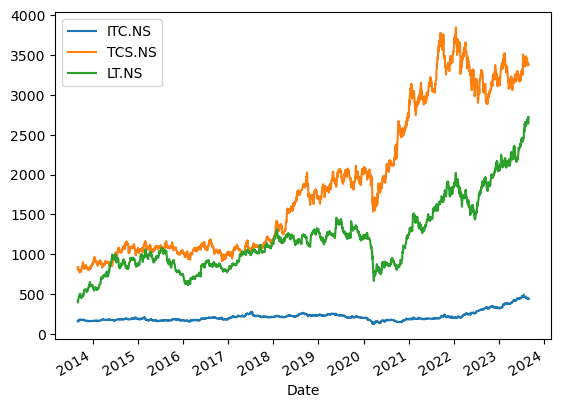

In [23]:
cl_price.plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

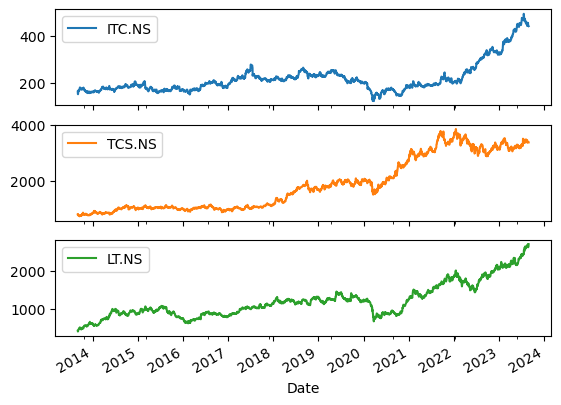

In [24]:
cl_price.plot(subplots=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

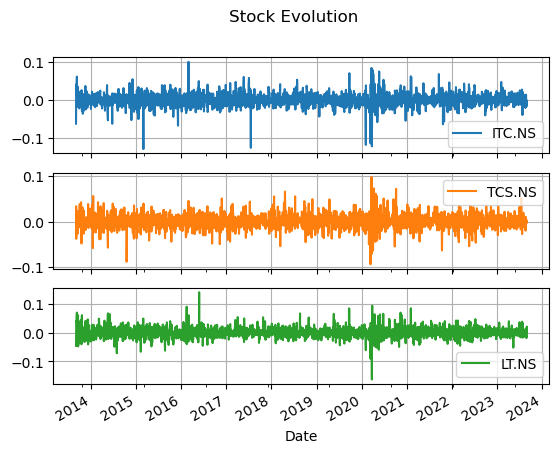

In [26]:
daily_returns.plot(subplots=True,title="Stock Evolution",grid=True)

<Axes: xlabel='Date'>

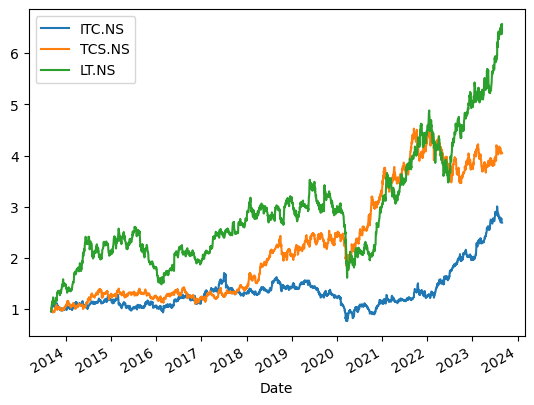

In [30]:
(1+daily_returns).cumprod().plot()

<BarContainer object of 3 artists>

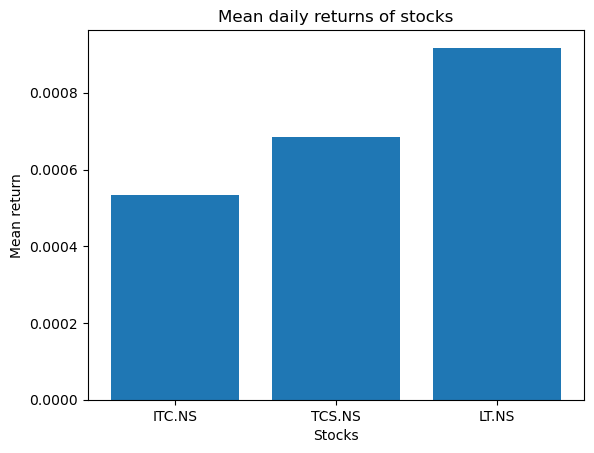

In [34]:
fig,ax =plt.subplots()
ax.set(title="Mean daily returns of stocks",xlabel="Stocks",ylabel="Mean return")
plt.bar(x=daily_returns.columns,height=daily_returns.mean())
